# **Assignment 10**

In [1]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [4]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()


**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [10]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris_target_names = iris.target_names
print(iris_target_names)

['setosa' 'versicolor' 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [14]:
X = iris.data
y = iris.target

knn = KNN(n_neighbors=5)

knn.fit(X,y)

new_observations = [[5.2, 3.2, 1.1, 0.1], [6.5, 3.0, 5.5, 1.8], [7.7, 2.8, 6.7, 2.0]]

predictions = knn.predict(new_observations)

target_names = iris.target_names[predictions]

print(target_names)

['setosa' 'virginica' 'virginica']


So with the new observations, the KNN model predicted that the new values are : setosa, virginica and virginica

**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [15]:
X_train,X_test, y_train, y_test = tts(X,y, test_size=0.2, stratify=y, random_state=1204)

knn = KNN(n_neighbors=5)

knn.fit(X_train, y_train)

print(knn.score(X_test,y_test))

0.9666666666666667


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

In [16]:
neighbors = np.arange(1,30)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	knn = KNN(n_neighbors=neighbor)
  
	knn.fit(X_train, y_train)
  
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] 
 {1: 1.0, 2: 0.9583333333333334, 3: 0.9583333333333334, 4: 0.9583333333333334, 5: 0.9666666666666667, 6: 0.9666666666666667, 7: 0.9666666666666667, 8: 0.9666666666666667, 9: 0.9666666666666667, 10: 0.9666666666666667, 11: 0.975, 12: 0.975, 13: 0.9666666666666667, 14: 0.9583333333333334, 15: 0.9666666666666667, 16: 0.9583333333333334, 17: 0.975, 18: 0.9583333333333334, 19: 0.9666666666666667, 20: 0.9666666666666667, 21: 0.9666666666666667, 22: 0.9666666666666667, 23: 0.9583333333333334, 24: 0.95, 25: 0.95, 26: 0.95, 27: 0.9583333333333334, 28: 0.95, 29: 0.9583333333333334} 
 {1: 0.9666666666666667, 2: 0.9666666666666667, 3: 0.9666666666666667, 4: 0.9333333333333333, 5: 0.9666666666666667, 6: 0.9666666666666667, 7: 1.0, 8: 0.9333333333333333, 9: 0.9666666666666667, 10: 0.9333333333333333, 11: 0.9666666666666667, 12: 0.9666666666666667, 13: 1.0, 14: 0.9666666666666667, 15: 1.0, 16: 0.933333333333333

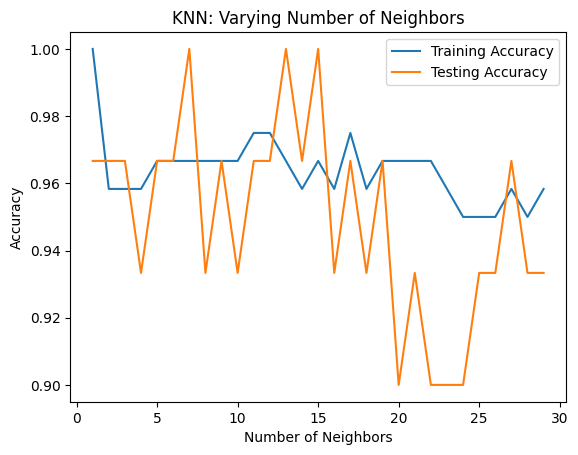

In [17]:
plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()